In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
     

In [12]:
# Load the dataset
data = pd.read_csv('C:/Users/user/Downloads/HR_comma_sep.csv')

# Check for missing values
missing_values = data.isnull().sum()

# Summarize the dataset
data_summary = data.describe()

# Display results
print("Missing Values:\n", missing_values)
print("\nData Summary:\n", data_summary)


Missing Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Data Summary:
        satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.0000

2. Exploratory Data Analysis (EDA)
Objective: Identify factors contributing most to employee turnover.

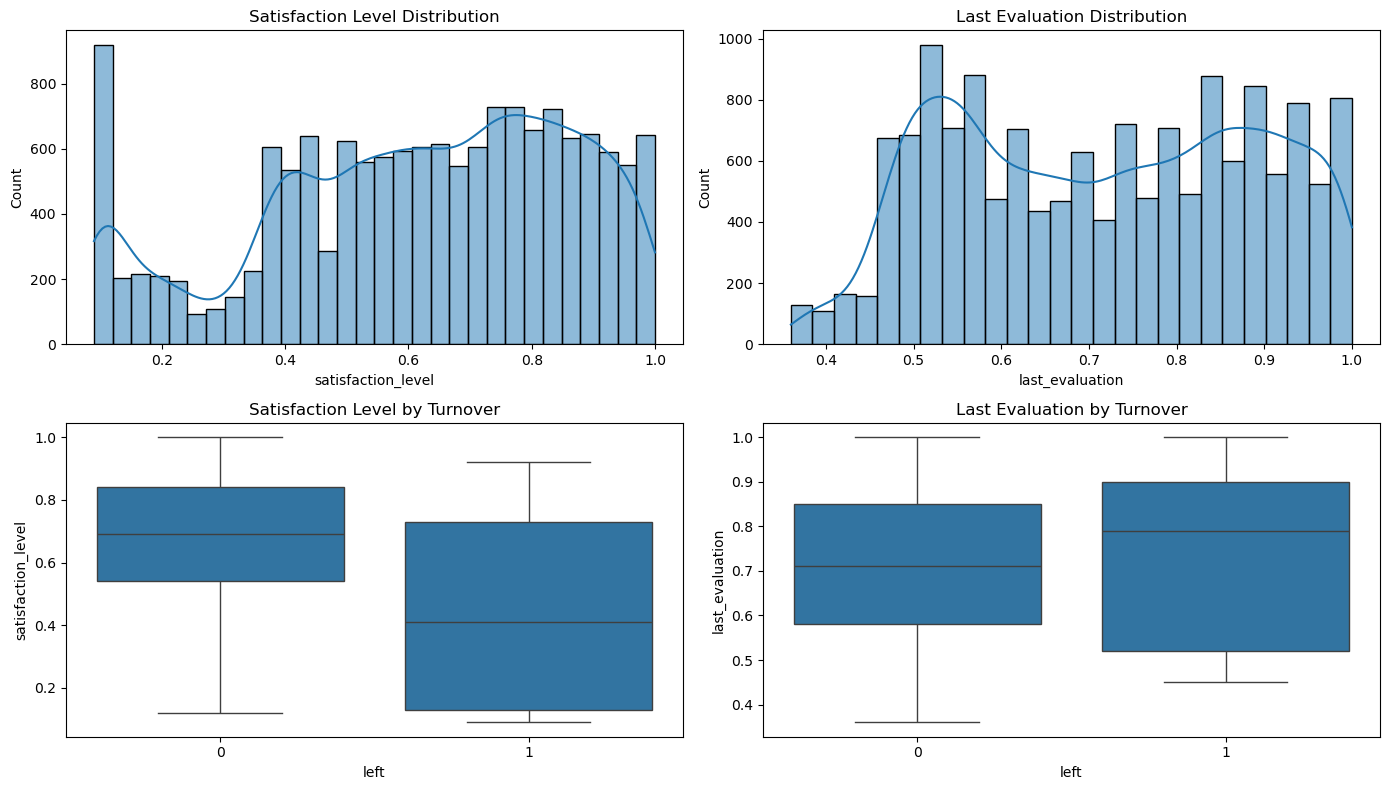

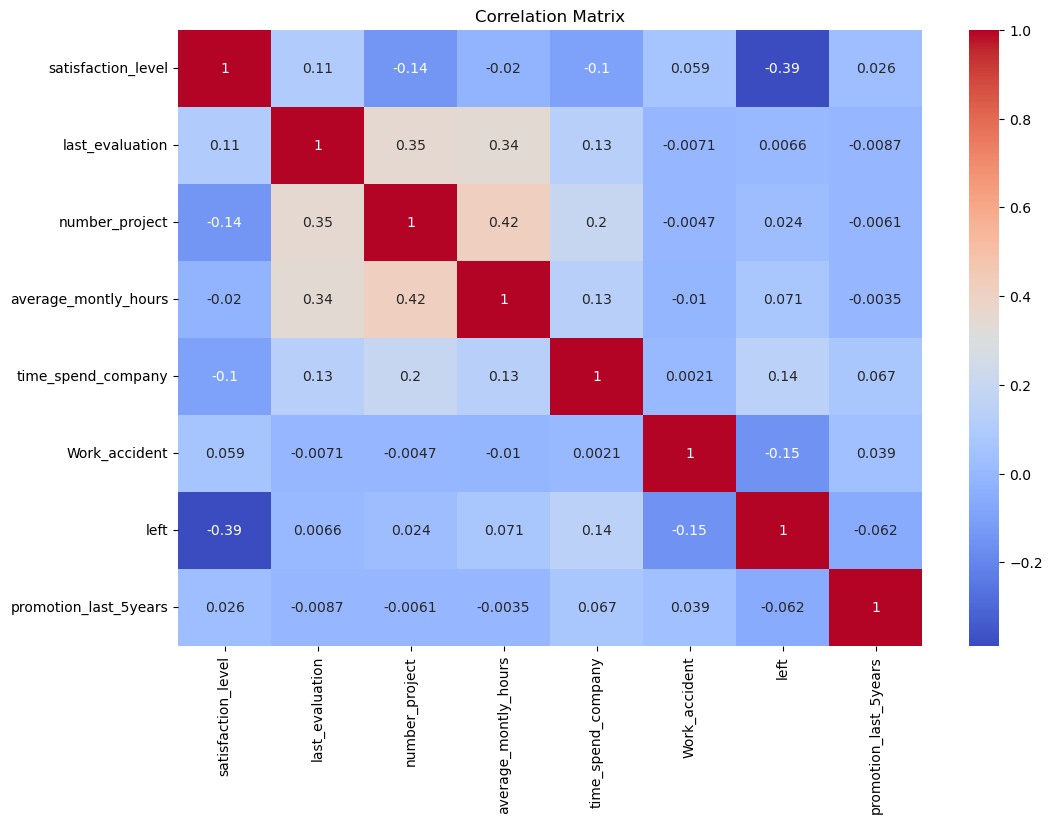

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization
plt.figure(figsize=(14, 8))

# Distribution of satisfaction level
plt.subplot(2, 2, 1)
sns.histplot(data['satisfaction_level'], kde=True)
plt.title('Satisfaction Level Distribution')

# Distribution of last evaluation
plt.subplot(2, 2, 2)
sns.histplot(data['last_evaluation'], kde=True)
plt.title('Last Evaluation Distribution')

# Compare features between employees who left and stayed
plt.subplot(2, 2, 3)
sns.boxplot(x='left', y='satisfaction_level', data=data)
plt.title('Satisfaction Level by Turnover')

plt.subplot(2, 2, 4)
sns.boxplot(x='left', y='last_evaluation', data=data)
plt.title('Last Evaluation by Turnover')

plt.tight_layout()
plt.show()

# Calculate correlation matrix for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 3. Clustering Employees Based on Satisfaction and Evaluation

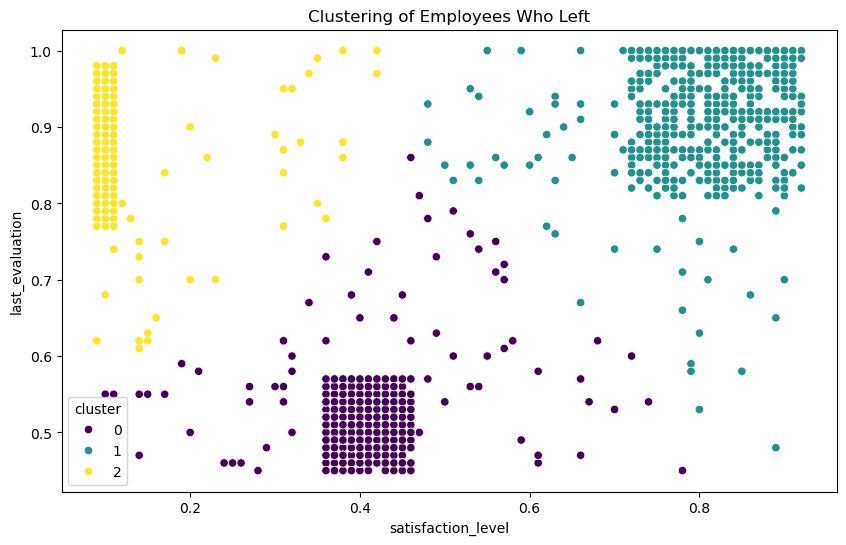

In [19]:
from sklearn.cluster import KMeans

# Filter data for employees who left
left_employees = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(left_employees)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees, palette='viridis')
plt.title('Clustering of Employees Who Left')
plt.show()

### 4. Handle Class Imbalance Using SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)

# Separate features and target
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### 5. Model Training and Evaluation Using K-Fold Cross-Validation

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with increased max_iter for Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=10000)
rf = RandomForestClassifier(random_state=42)

# Perform K-Fold cross-validation
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Display results
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Random Forest Cross-Validation Scores:", rf_scores)

# Train final models
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)

# Evaluate on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
y_pred_lr = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Random Forest
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Display results
print("Logistic Regression - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(lr_accuracy, lr_precision, lr_recall, lr_f1))
print("Random Forest - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(rf_accuracy, rf_precision, rf_recall, rf_f1))


Logistic Regression Cross-Validation Scores: [0.78835111 0.78534318 0.79382007 0.80639869 0.79212254]
Random Forest Cross-Validation Scores: [0.98578069 0.98386656 0.98769483 0.98769483 0.98659737]
Logistic Regression - Accuracy: 0.80, Precision: 0.78, Recall: 0.82, F1-Score: 0.80
Random Forest - Accuracy: 0.99, Precision: 1.00, Recall: 0.98, F1-Score: 0.99


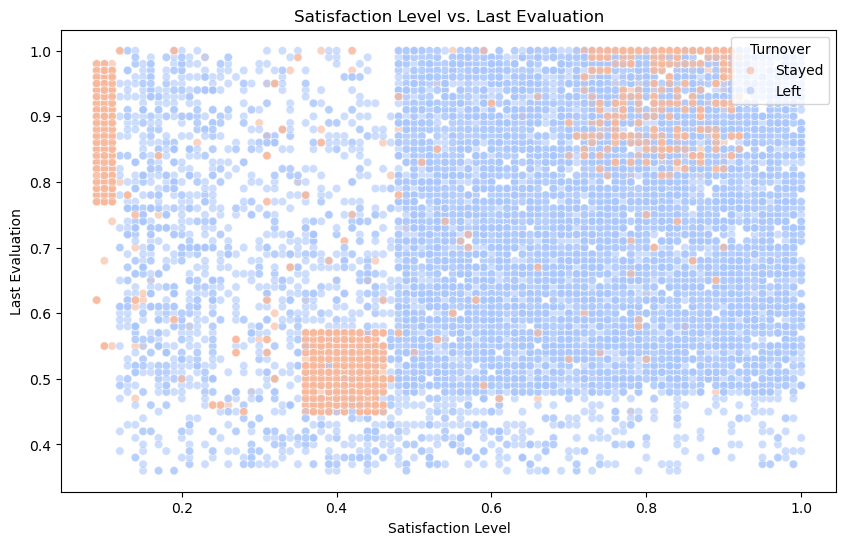

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('C:/Users/user/Downloads/HR_comma_sep.csv')

# Scatter plot of satisfaction level vs. last evaluation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=data, palette='coolwarm', alpha=0.6)
plt.title('Satisfaction Level vs. Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Turnover', loc='upper right', labels=['Stayed', 'Left'])
plt.show()


   Probability       Risk Zone  Color
0         0.00       Safe Zone  Green
1         0.01       Safe Zone  Green
2         1.00  High Risk Zone    Red
3         1.00  High Risk Zone    Red
4         0.00       Safe Zone  Green
5         0.00       Safe Zone  Green
6         0.00       Safe Zone  Green
7         0.00       Safe Zone  Green
8         1.00  High Risk Zone    Red
9         1.00  High Risk Zone    Red


C:\Users\user\AppData\Local\Temp\ipykernel_22552\2510259137.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk Zone', data=results, palette=colors)


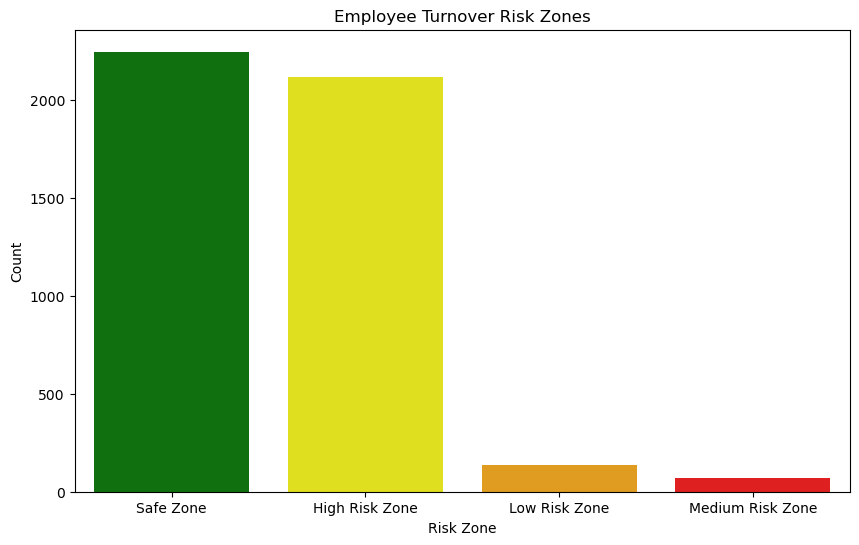

In [31]:
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)

# Separate features and target
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
randm = RandomForestClassifier(random_state=42)
randm.fit(X_train_scaled, y_train)

# Predict probabilities
predict_probability = randm.predict_proba(X_test_scaled)

# Extract the probabilities of the positive class (turnover)
probabilities = predict_probability[:, 1]

# Classify employees into risk zones
zone = []
prob = []

for i in probabilities:
    prob.append(i)
    if i <= 0.2:
        zone.append("Safe Zone")
    elif 0.2 < i <= 0.6:
        zone.append("Low Risk Zone")
    elif 0.6 < i <= 0.9:
        zone.append("Medium Risk Zone")
    else:
        zone.append("High Risk Zone")

# Create a DataFrame to display the results
results = pd.DataFrame({'Probability': prob, 'Risk Zone': zone})

# Define categories and colors
categories = ["Safe Zone", "Low Risk Zone", "Medium Risk Zone", "High Risk Zone"]
colors = ["Green", "Yellow", "Orange", "Red"]

# Create a color dictionary
colordict = dict(zip(categories, colors))

# Map colors to risk zones
results['Color'] = results['Risk Zone'].apply(lambda x: colordict[x])

# Display the first few rows of the results
print(results.head(10))

# Create a color list for plotting
color_list = results['Color'].tolist()

# Plot the count of employees in each risk zone
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk Zone', data=results, palette=colors)
plt.title('Employee Turnover Risk Zones')
plt.xlabel('Risk Zone')
plt.ylabel('Count')
plt.show()